## This is an implementation of the Policy iteration and value iteration algorithms. An object oriented approach is taken to imepelement both this problem instances. 

In [1]:
import numpy  as np
import matplotlib.pyplot as plt


## The Following Shows the sudo code for the value iteration algorithm
```
Procedure Value_Iteration(S,A,P,R,θ)

Inputs

  S is the set of all states

  A is the set of all actions

  P is state transition function specifying P(s'|s,a)

  R is a reward function R(s,a,s')

  θ a threshold, θ>0
Output
  π[S] approximately optimal policy

  V[S] value function

  Local
12:                     real array Vk[S] is a sequence of value functions
13:                     action array π[S]
14:           assign V0[S] arbitrarily
15:           k ←0
16:           repeat
17:                     k ←k+1
18:                     for each state s do
19:                               Vk[s] = maxa ∑s' P(s'|s,a) (R(s,a,s')+ γVk-1[s'])
20:           until ∀s |Vk[s]-Vk-1[s]| < θ
21:           for each state s do
22:                     π[s] = argmaxa ∑s' P(s'|s,a) (R(s,a,s')+ γVk[s'])
23:           return π,Vk
```





In [2]:
# the following is a class of states, each entity has a value function and a set of possible actions
class States: 
  def __init__(self, val, v_init):   
        self.State_value = val
        self.reward = 0.0
        self.value_function = v_init
        if self.State_value == 100:
          self.reward = 1.0
        self.possible_actions = [i for i in range(min(self.State_value + 1, 101 - self.State_value))]
        self.optimal_action = 0 




# The following is a class of problem instance. Different MDPs can be solved with this class using different parameters. 
class Problem_instance:   
  def __init__(self, goal, heads_prob, v_init, theta):
    self.theta = theta
    self.v_init = v_init
    self.heads_prob = heads_prob
    self.goal = goal
    self.states = [States(i, self.v_init) for i in range(self.goal + 1)]

  def Value_iteration(self): 
    '''
    This method implements the value iteration algorithm
    '''
    print("Initializing the value functions with 0")
    while True: 
      delta = 0.0
      for state in self.states[1:100]:
        expected_return = []
        v = state.value_function
        for action in state.possible_actions:
          temp = self.heads_prob * (self.states[state.State_value + action].reward + self.states[state.State_value + action].value_function) \
                     + (1 - self.heads_prob) * (self.states[state.State_value - action].reward + self.states[state.State_value - action].value_function)
          expected_return.append(temp)
        state.value_function = max(expected_return)
        delta = max(delta, np.abs(v - state.value_function))
      if delta < self.theta:
        print("Value iteration terminated succusfuly" )
        break

  def Policy(self):
    '''
    This method finds the optimal policy from the value functions of all the states
    '''
    for state in self.states[1:self.goal]:
      optimal_action = 0
      action_val = 0.0
      expected_return = []
      for action in state.possible_actions:
        temp = self.heads_prob * (self.states[state.State_value + action].reward + self.states[state.State_value + action].value_function) \
                     + (1 - self.heads_prob) * (self.states[state.State_value - action].reward + self.states[state.State_value - action].value_function)
        expected_return.append(temp)
        if temp >= action_val:
          action_val = temp
          optimal_action = action
      state.optimal_action = optimal_action

  def policy_iteration(self):
    policy = [0 for i in range(self.goal+1)]  
    while True:
      delta = 0.0
      theta=[]
      for state in self.states[1:self.goal]:
        v = state.value_function
        v_temp = state.value_function
        for action in state.possible_actions:
          New_value = self.heads_prob * (self.states[state.State_value + action].reward + self.states[state.State_value + action].value_function) \
                     + (1 - self.heads_prob) * (self.states[state.State_value - action].reward + self.states[state.State_value - action].value_function)
          if New_value > (v_temp + self.theta):
              v_temp = New_value
              state.value_function = New_value
              policy[state.State_value] = action
      theta.append(abs(state.value_function - v))  
      if max(theta) < self.theta:
        break
    plt.plot([i for i in range(self.goal + 1) ], policy)
    plt.title("Policy plot, Policy iteration algorithm")
    plt.show()


  def Plot_value(self): 
    V = []
    for state in self.states[:100]: 
      V.append(state.value_function)
    plt.plot([i for i in range(self.goal)], V)
    plt.title("Probabilty of turning head :"+ str(self.heads_prob))
    plt.show()

  def Plot_policy(self): 
    policy = []
    for state in self.states[1:self.goal]: 
      policy.append(state.optimal_action)
    plt.plot([i for i in range(1, 100)], policy)
    plt.xticks(np.arange(0, 100, 9))
    plt.xlim(0, 100)
    plt.title("Probabilty of turning head :"+ str(self.heads_prob))
    plt.show()

Initializing the value functions with 0
Value iteration terminated succusfuly


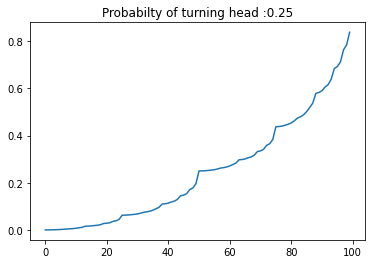

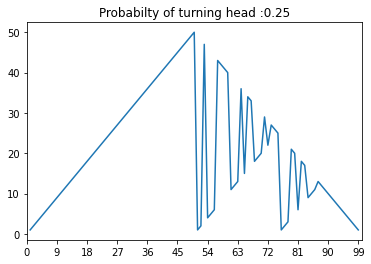

In [7]:
goal = 100
heads_prob = .25
v_init = 0.0
theta = 1.0e-5
problem = Problem_instance(goal,  heads_prob, v_init, theta)
problem.Value_iteration()
problem.Policy()
problem.Plot_value()
problem.Plot_policy()


Initializing the value functions with 0
Value iteration terminated succusfuly


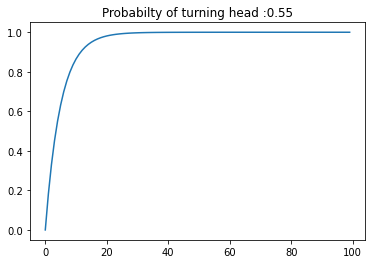

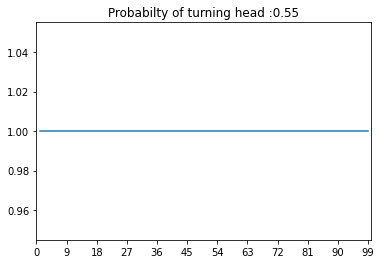

In [8]:
goal = 100
heads_prob = .55
v_init = 0.0
theta =  1.0e-5
problem = Problem_instance(goal,  heads_prob, v_init, theta)
problem.Value_iteration()
problem.Policy()
problem.Plot_value()
problem.Plot_policy()

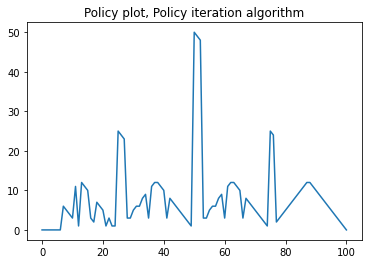

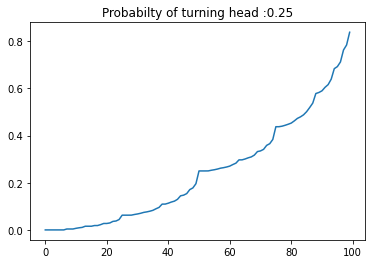

In [9]:
goal = 100
heads_prob = .25
v_init = 0.0
theta =  1.0e-5
problem = Problem_instance(goal,  heads_prob, v_init, theta)
problem.policy_iteration()
problem.Plot_value()

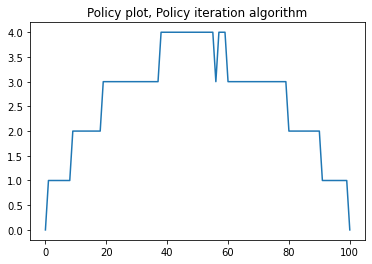

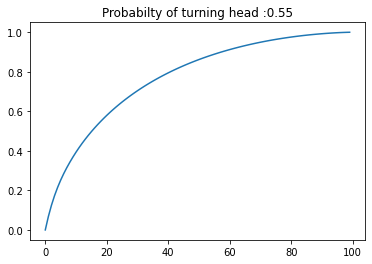

In [10]:
goal = 100
heads_prob = .55
v_init = 0.0
theta =  1.0e-5
problem = Problem_instance(goal,  heads_prob, v_init, theta)
problem.policy_iteration()
problem.Plot_value()